In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#from model.resnet import ResNet18
from main import *
from utils import *
from custom_resnet import*

Files already downloaded and verified
Files already downloaded and verified


In [2]:
#CUDA application 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
#model summary 
dropout= 0.10
from custom_resnet import Model_S10
from torchsummary import* 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model_S10().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

In [4]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, 100.*correct/len(test_loader.dataset)

In [5]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups: 
        return param_group['lr']

  0%|          | 0/400 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.03E-02


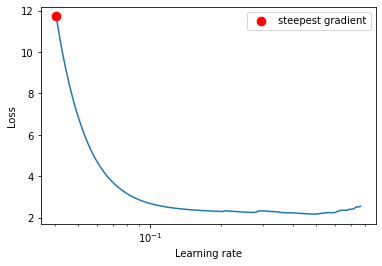

In [15]:
from  torch_lr_finder import LRFinder 

optimizer = optim.Adam(model.parameters(), lr=0.035, weight_decay= 1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model,optimizer,  criterion, device= "cuda" )
lr_finder.range_test (trainloader, end_lr = 10, num_iter =400, step_mode ="exp")
lr_finder.plot()
lr_finder.reset()

In [6]:
from torch.optim.lr_scheduler import OneCycleLR
optimizer = optim.Adam(model.parameters(), lr=0.035, weight_decay= 1e-4)
criterion = nn.CrossEntropyLoss()
epochs= 24
learning_rate = []
scheduler = OneCycleLR(
    optimizer, 
    max_lr=  4.03E-02,
    steps_per_epoch= len(trainloader),
    epochs = epochs,
    pct_start =5/epochs,
    div_factor =100, 
    three_phase =False, 
    final_div_factor =100,
    anneal_strategy= 'linear'
    )

In [8]:
train_loss_list = []
test_loss_list = []
train_accuracy_list=[]
test_accuracy_list=[]
learning_rate = []

for epoch in range(epochs):
    print(f"Epoch {epoch}")
    learning_rate.append (scheduler.get_lr())
    train_loss,train_acc = train(model, device, trainloader, optimizer, epoch, criterion,scheduler)
    #Sheduler.step()
    
    test_loss,test_acc = test(model,device,  testloader)

    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)
#learning_rate.append (scheduler.get_lr())

  0%|                                                                                           | 0/98 [00:00<?, ?it/s]

Epoch 0


loss=1.5146912336349487 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.76it/s]



Train set: Average loss: 0.0041, Accuracy: 16731/50000 (33.46%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.7735, Accuracy: 4060/10000 (40.60%)

Epoch 1


loss=1.185870885848999 batch_id=97: 100%|██████████████████████████████████████████████| 98/98 [00:56<00:00,  1.74it/s]



Train set: Average loss: 0.0027, Accuracy: 24806/50000 (49.61%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3196, Accuracy: 5731/10000 (57.31%)

Epoch 2


loss=1.2135556936264038 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:53<00:00,  1.83it/s]



Train set: Average loss: 0.0023, Accuracy: 29167/50000 (58.33%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2121, Accuracy: 5956/10000 (59.56%)

Epoch 3


loss=0.9431464076042175 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:53<00:00,  1.84it/s]



Train set: Average loss: 0.0020, Accuracy: 31876/50000 (63.75%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1639, Accuracy: 6360/10000 (63.60%)

Epoch 4


loss=0.9179015159606934 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:53<00:00,  1.82it/s]



Train set: Average loss: 0.0018, Accuracy: 33452/50000 (66.90%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8096, Accuracy: 7127/10000 (71.27%)

Epoch 5


loss=1.0155216455459595 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:53<00:00,  1.84it/s]



Train set: Average loss: 0.0017, Accuracy: 34568/50000 (69.14%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8079, Accuracy: 7204/10000 (72.04%)

Epoch 6


loss=0.7592952847480774 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.76it/s]



Train set: Average loss: 0.0016, Accuracy: 35637/50000 (71.27%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8764, Accuracy: 7105/10000 (71.05%)

Epoch 7


loss=0.730430543422699 batch_id=97: 100%|██████████████████████████████████████████████| 98/98 [00:54<00:00,  1.81it/s]



Train set: Average loss: 0.0016, Accuracy: 36093/50000 (72.19%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7342, Accuracy: 7587/10000 (75.87%)

Epoch 8


loss=0.7993651032447815 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:56<00:00,  1.74it/s]



Train set: Average loss: 0.0015, Accuracy: 36647/50000 (73.29%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6360, Accuracy: 7881/10000 (78.81%)

Epoch 9


loss=0.7077876925468445 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.76it/s]



Train set: Average loss: 0.0015, Accuracy: 36980/50000 (73.96%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6745, Accuracy: 7707/10000 (77.07%)

Epoch 10


loss=0.7080246806144714 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:53<00:00,  1.83it/s]



Train set: Average loss: 0.0014, Accuracy: 37246/50000 (74.49%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6301, Accuracy: 7877/10000 (78.77%)

Epoch 11


loss=0.723296046257019 batch_id=97: 100%|██████████████████████████████████████████████| 98/98 [00:54<00:00,  1.78it/s]



Train set: Average loss: 0.0014, Accuracy: 37663/50000 (75.33%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7106, Accuracy: 7623/10000 (76.23%)

Epoch 12


loss=0.7428582310676575 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:54<00:00,  1.81it/s]



Train set: Average loss: 0.0014, Accuracy: 37921/50000 (75.84%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6912, Accuracy: 7810/10000 (78.10%)

Epoch 13


loss=0.6044697165489197 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:53<00:00,  1.84it/s]



Train set: Average loss: 0.0013, Accuracy: 38318/50000 (76.64%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6321, Accuracy: 7825/10000 (78.25%)

Epoch 14


loss=0.6938304901123047 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:53<00:00,  1.84it/s]



Train set: Average loss: 0.0013, Accuracy: 38597/50000 (77.19%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6102, Accuracy: 7991/10000 (79.91%)

Epoch 15


loss=0.6378158330917358 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:54<00:00,  1.81it/s]



Train set: Average loss: 0.0012, Accuracy: 39120/50000 (78.24%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6605, Accuracy: 7849/10000 (78.49%)

Epoch 16


loss=0.6483494639396667 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:53<00:00,  1.83it/s]



Train set: Average loss: 0.0012, Accuracy: 39356/50000 (78.71%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5103, Accuracy: 8279/10000 (82.79%)

Epoch 17


loss=0.5752604603767395 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:53<00:00,  1.83it/s]



Train set: Average loss: 0.0011, Accuracy: 39793/50000 (79.59%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5619, Accuracy: 8141/10000 (81.41%)

Epoch 18


loss=0.6843724250793457 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:54<00:00,  1.79it/s]



Train set: Average loss: 0.0011, Accuracy: 40302/50000 (80.60%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4632, Accuracy: 8461/10000 (84.61%)

Epoch 19


loss=0.48743900656700134 batch_id=97: 100%|████████████████████████████████████████████| 98/98 [00:56<00:00,  1.74it/s]



Train set: Average loss: 0.0010, Accuracy: 40857/50000 (81.71%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4784, Accuracy: 8424/10000 (84.24%)

Epoch 20


loss=0.41596609354019165 batch_id=97: 100%|████████████████████████████████████████████| 98/98 [00:55<00:00,  1.76it/s]



Train set: Average loss: 0.0010, Accuracy: 41425/50000 (82.85%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4664, Accuracy: 8461/10000 (84.61%)

Epoch 21


loss=0.3947847783565521 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:57<00:00,  1.71it/s]



Train set: Average loss: 0.0009, Accuracy: 42101/50000 (84.20%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4065, Accuracy: 8628/10000 (86.28%)

Epoch 22


loss=0.3092397153377533 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.77it/s]



Train set: Average loss: 0.0008, Accuracy: 43054/50000 (86.11%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3377, Accuracy: 8895/10000 (88.95%)

Epoch 23


loss=0.3003857731819153 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:54<00:00,  1.81it/s]



Train set: Average loss: 0.0007, Accuracy: 43884/50000 (87.77%)


Test set: Average loss: 0.3017, Accuracy: 9027/10000 (90.27%)



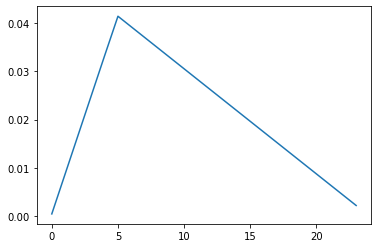

In [9]:
plt.plot (learning_rate)

Text(0.5, 1.0, 'Loss per epoch')

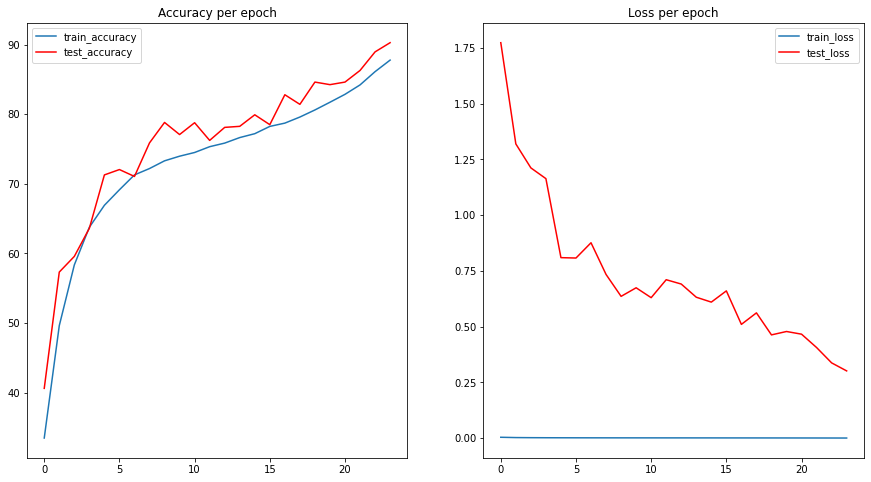

In [10]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [15, 8]
plt.subplot(1,2, 1)
plt.plot(np.array(train_accuracy_list))
plt.plot(np.array(test_accuracy_list), 'r')
plt.legend(["train_accuracy", "test_accuracy"])
plt.title("Accuracy per epoch")

plt.subplot(1,2,2)
plt.plot(train_loss_list)
plt.plot(test_loss_list, 'r')
plt.legend(["train_loss", "test_loss"])
plt.title("Loss per epoch")

In [11]:
from pylab import *
train_loader, test_loader = getCifar10DataLoader() 
#net = net.to(device)
model.eval()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

#classes = testset.classes
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Files already downloaded and verified
Files already downloaded and verified
Accuracy of plane : 100 %
Accuracy of   car : 89 %
Accuracy of  bird : 75 %
Accuracy of   cat : 69 %
Accuracy of  deer : 95 %
Accuracy of   dog : 75 %
Accuracy of  frog : 92 %
Accuracy of horse : 95 %
Accuracy of  ship : 100 %
Accuracy of truck : 83 %


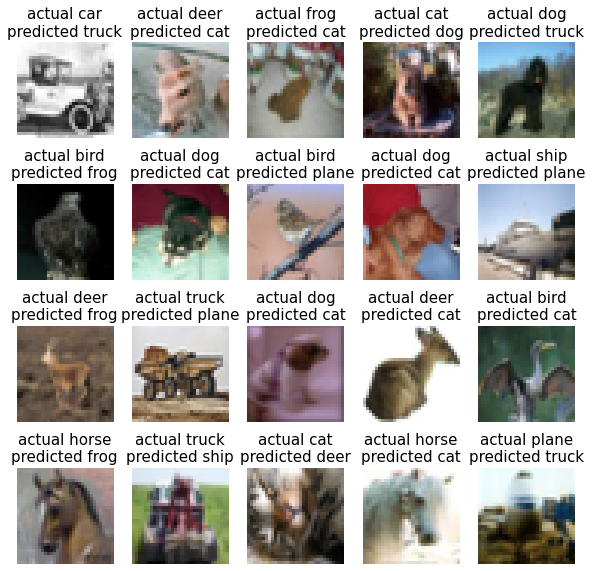

In [12]:
wp = getWrongPredictions(model, device, test_loader)
plotWrongPredictions(wp)